# 분류 성능 평가

분류 문제는 회귀 분석과 달리 다양한 성능 평가 기준이 필요하다.

## Scikit-Learn 에서 지원하는 분류 성능 평가 명령

* `sklearn.metrics` 서브 패키지
 * `confusion_matrix()`
 * `classfication_report()`
 * `accuracy_score(y_true, y_pred)`
 * `precision_score(y_true, y_pred)`
 * `recall_score(y_true, y_pred)`
 * `fbeta_score(y_true, y_pred, beta)`
 * `f1_score(y_true, y_pred)`


## 분류 결과표 Confusion Matrix

분류 결과표는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과이다.

원래 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.



| | 예측 클래스 0 | 예측 클래스 1 | 예측 클래스 2 | 
|-|-|-|-|
| 원 클래스 0 | <small>원 클래스가 0, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 0, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 0, 예측 클래스가 2인 표본의 수</small> |
| 원 클래스 1 | <small>원 클래스가 1, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 1, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 1, 예측 클래스가 2인 표본의 수</small> |
| 원 클래스 2 | <small>원 클래스가 2, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 2, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 2, 예측 클래스가 2인 표본의 수</small> |


In [1]:
from sklearn.metrics import confusion_matrix

In [2]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

## 이진 분류 결과표 Binary Confusion Matrix

클래스가 0과 1 두 종류 밖에 없는 경우에는 일반적으로 클래스 이름을 "Positive"와 "Negative"로 표시한다. 

또, 분류 모형의 예측 결과가 맞은 경우, 즉 Positive를 Positive라고 예측하거나 Negative를 Negative라고 예측한 경우에는 "True"라고 하고 예측 결과가 틀린 경우, 즉 Positive를 Negative라고 예측하거나 Negative를 Positive라고 예측한 경우에는 "False"라고 한다.

이 경우의 이진 분류 결과의 명칭과 결과표는 다음과 같다. 

| | Positive라고 예측  | Negative라고 예측 | 
|-|-|-|
| 실제 Positive | True Positive   |  False Negative |             
| 실제 Negative | False Positive  |  True Negative  |   

### FDS(Fraud Detection System)의 예

FDS(Fraud Detection System)는 금융 거래, 회계 장부 등에서 잘못된 거래, 사기 거래를 찾아내는 시스템을 말한다. FDS의 예측 결과가 Positive 이면  사기 거래라고 예측한 것이고 Negative 이면 정상 거래라고 예측한 것이다. 이 결과가 사실과 일치하는지 틀리는지에 따라 다음과 같이 말한다.

* True Positive: 사기를 사기라고 정확하게 예측
* True Negative: 정상을 정상이라고 정확하게 예측
* False Positive: 정상을 사기라고 잘못 예측
* False Negative: 사기를 정상이라고 잘못 예측

|                     | 사기 거래라고 예측                | 정상 거래라고 예측                         | 
| --------------------| ------------------------ | --------------------------------- |
| 실제로 사기 거래  | True Positive            |  False Negative                   |             
| 실제로 정상 거래  | False Positive            |  True Negative                    |   

## 평가 점수

### Accuracy 정확도

  * 전체 샘플 중 맞게 예측한 샘플 수의 비율
  * 모형 트레이닝 즉 최적화에서 목적함수로 사용  
 
 $$\text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN}$$

### Precision 정밀도
* Positive 클래스에 속한다고 출력한 샘플 중 실제로 Positive 클래스에 속하는 샘플 수의 비율
* FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율. 유죄율
 
$$\text{precision} = \dfrac{TP}{TP + FP}$$

### Recall 재현율
* 실제 Positive 클래스에 속한 샘플 중에 Positive 클래스에 속한다고 출력한 표본의 수
* FDS의 경우, 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율. 검거율
* TPR(true positive rate)
* sensitivity(민감도)
 
$$\text{recall} = \dfrac{TP}{TP + FN}$$

### Fall-Out 위양성율
* 실제 Positive 클래스에 속하지 않는 샘플 중에 Positive 클래스에 속한다고 출력한 표본의 수
* FDS의 경우, 실제 정상 거래 중에서 FDS가 사기 거래라고 예측한 거래의 비율, 원죄(寃罪)율
* FPR(alse positive rate)
* specificity(특이도) = 1 - fall-out

$$\text{fallout} = \dfrac{FP}{FP + TN}$$

### F (beta) score
* 정밀도(Precision)과 재현율(Recall)의 가중 조화 평균
 
$$
F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})
$$


* F1 score
 * beta = 1 

$$
F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})
$$

Scikit-Learn의 metrics 패키지에서는 정밀도, 재현율, F1-score를 구하는 ``classification_report`` 명령을 제공한다.
이 명령은 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1-score를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가한다.

In [3]:
from sklearn.metrics import classification_report

In [4]:
y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

             precision    recall  f1-score   support

    class 0       0.75      0.60      0.67         5
    class 1       0.33      0.50      0.40         2

avg / total       0.63      0.57      0.59         7



위 ``classification_report`` 결과에서 0이라고 예측한 데이터의 75%만 실제로 0이었고 1이라고 예측한 데이터의 33%만 실제로 1이었음을 알 수 있다. 또한 실제 0인 데이터 중의 60%만 1로 판별되었고 실제 1인 데이터 중의 50%만 1로 판별되었음을 알 수 있다.

다중 클래스 문제의 경우에도 전체 모형에 대해 정밀도, 재현율, 위양성률을 구할 수 없으므로 각각의 클래스를 양성(positive) 클래스로, 다른 클래스를 음성 클래스로 가정하여 OvR 문제를 풀고 각각에 대해 정밀도, 재현율, 위양성률을 구한다.

In [5]:
y_true = [0, 0, 1, 1, 2, 2, 2]
y_pred = [0, 0, 1, 2, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00         2
    class 1       0.50      0.50      0.50         2
    class 2       0.67      0.67      0.67         3

avg / total       0.71      0.71      0.71         7



위에서 설명한 각종 평가 점수들은 서로 밀접한 관계를 맺고 있다. 예를 들어

* 재현율(recall)과 위양성률(fall-out)은 양의 상관 관계가 있다.
* 정밀도(precision)와 재현율(recall)은 대략적으로 음의 상관 관계가 있다.

재현율을 높이기 위해서는 양성으로 판단하는 기준(threshold)을 낮추어 약간의 증거만 있어도 양성으로 판단하도록 하면 된다.
그러나 이렇게 되면 음성임에도 양성으로 판단되는 표본 데이터가 같이 증가하게 되어 위양성율이 동시에 증가한다.
반대로 위양성율을 낮추기 위해 양성을 판단하는 기준을 엄격하게 두게 되면 증거 부족으로 음성 판단을 받는 표본 데이터의 수가 같이 증가하므로 재현율이 떨어진다.

정밀도의 경우에는 재현율과 위양성률처럼 정확한 상관 관계는 아니지만 대략적으로 음의 상관 관계를 가진다. 즉 정밀도를 높이기 위해 판단 기준을 엄격하게 할수록 재현율이나 위양성율이 감소하는 경향을 띤다. 

## ROC 커브

ROC(Receiver Operator Characteristic) 커브는 클래스 판별 기준값의 변화에 따른 위양성률(fall-out)과 재현율(recall)의 변화를 시각화한 것이다.

모든 이진 분류 모형은 판별 평면으로부터의 거리에 해당하는 판별 함수(discriminant function)를 가지며 판별 함수 값이 음수이면 0인 클래스, 양수이면 1인 클래스에 해당한다고 판별한다. 즉 0 이 클래스 판별 기준값이 된다. ROC 커브는 이 클래스 판별 기준값이 달라진다면 판별 결과가 어떻게 달라지는지는 표현한 것이다.

Scikit-Learn 의 Classification 클래스는 다음처럼 판별 함수 값을 계산하는 `decision_function` 메서드를 제공한다. 다음 표는 분류 문제를 풀고  `decision_function` 메서드를 이용하여 모든 표본 데이터에 대해 판별 함수 값을 계산한 다음 계산된 판별 함수 값이 가장 큰 데이터부터 가장 작은 데이터 순서로 정렬한 것이다.

In [6]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=16, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

In [8]:
df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.167628,1.0,1.0
1,1.861485,1.0,1.0
2,1.482220,1.0,1.0
3,1.447944,1.0,1.0
4,1.432822,1.0,1.0
5,1.035662,1.0,1.0
6,0.244729,1.0,0.0
7,-0.063016,0.0,1.0
8,-0.582239,0.0,0.0
9,-0.878385,0.0,0.0


ROC 커브는 이 표를 이용하여 다음과 같이 작성한다.

1. 현재는 0을 기준값(threshold)으로 클래스를 구분하여 판별함수값이 0보다 크면 양성(Positive), 작으면 음성(negative)이 된다.
2. 데이터 분류가 다르게 되도록 기준값을 증가 혹은 감소시킨다. 위의 표에서는 기준값을 0.244729보다 크도록 올리면 6번 데이터는 더이상 양성이 아니다.
3. 기준값을 여러가지 방법으로 증가 혹은 감소시키면서 이를 반복하면 여러가지 다른 기준값에 대해 분류 결과가 달라지고 재현율, 위양성률 등의 성능 평가 점수도 달라진다.

Scikit-Learn는 위 과정을 자동화한 `roc_curve` 명령을 제공한다. 인수로는 타겟 y 벡터와 판별함수 벡터(혹은 확률 벡터)를 넣고 결과로는 변화되는 기준값과 그 기준값을 사용했을 때의 재현율과 위양성률을 반환한다.

In [9]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([ 2.16762769,  1.03566193,  0.24472855, -0.06301587, -0.87838516,
        -1.02775912, -4.14855612]))

``decision_function`` 메서드를 제공하지 않는 모형은 ``predict_proba`` 명령을 써서 확률을 입력해도 된다.

In [10]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([0.89730457, 0.73801211, 0.56087859, 0.48425124, 0.29351253,
        0.26351878, 0.01554183]))

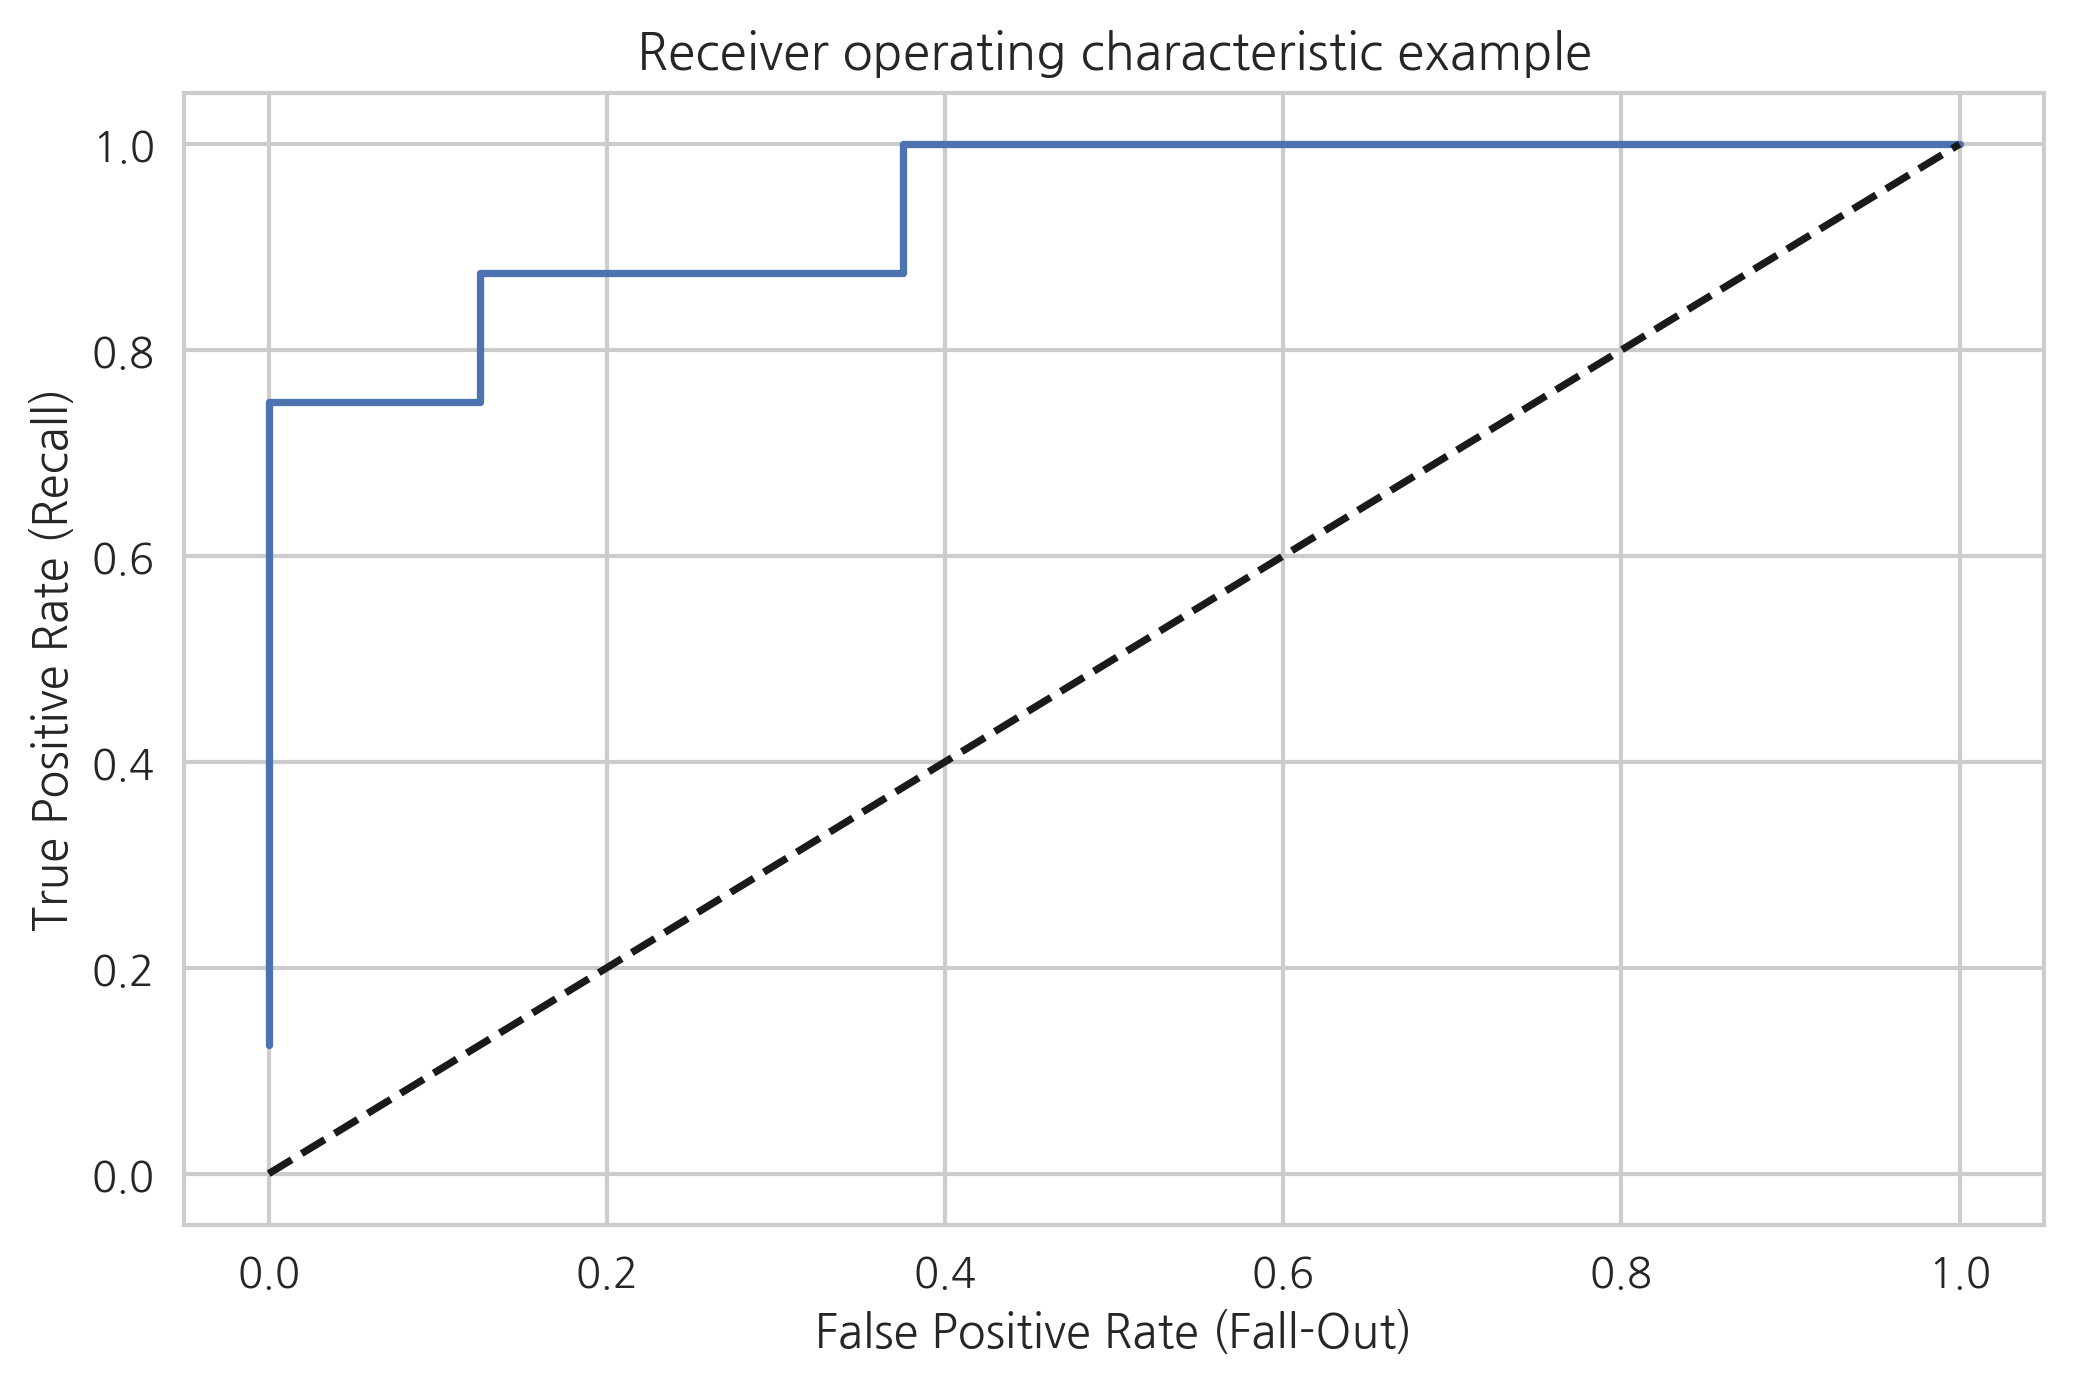

In [11]:
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

Scikit-Learn에서 만들어진 모형은 기본적으로 정확도(accuracy)를 최대화하는 모형이다. 
하지만 이 상태에서 정확도, 정밀도, 재현도 등의 성능이 비슷하게 나온 모형들도 ROC 커브에서 살펴보면 성능이 달라지는 것을 볼 수 있다.

In [12]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, weights=[0.9, 0.1], random_state=1)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0026, C=10, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

In [14]:
print(confusion_matrix(y, y_hat1))

[[8853   94]
 [ 397  656]]


In [15]:
print(confusion_matrix(y, y_hat2))

[[8894   53]
 [ 397  656]]


In [16]:
print(classification_report(y, model1.predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8947
          1       0.87      0.62      0.73      1053

avg / total       0.95      0.95      0.95     10000



In [17]:
print(classification_report(y, model2.predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      8947
          1       0.93      0.62      0.74      1053

avg / total       0.95      0.95      0.95     10000



In [18]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

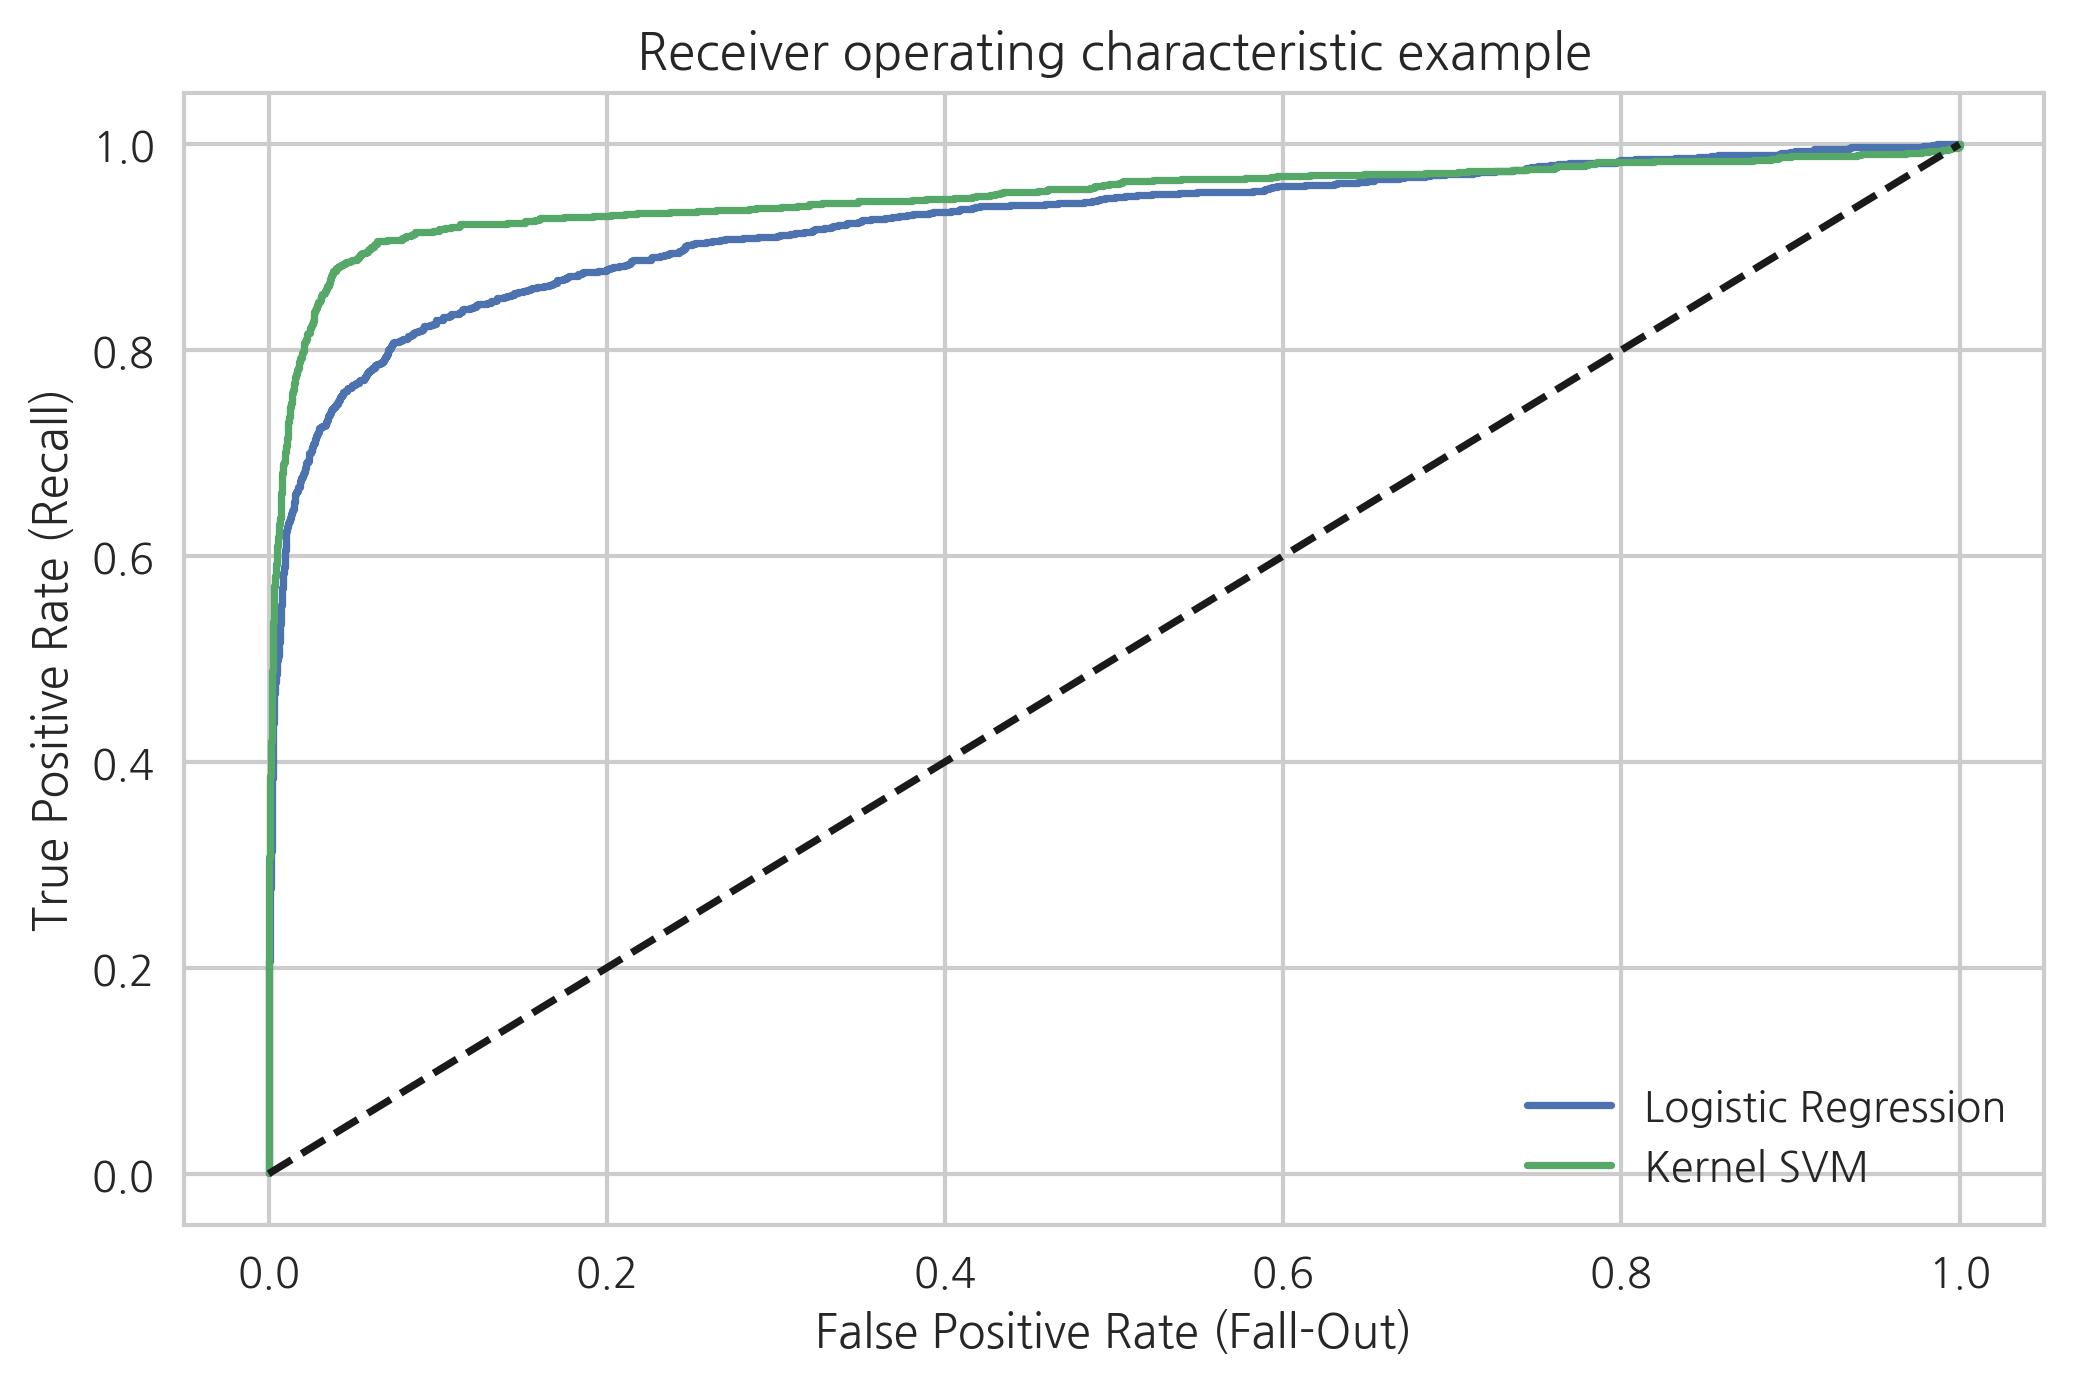

In [19]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

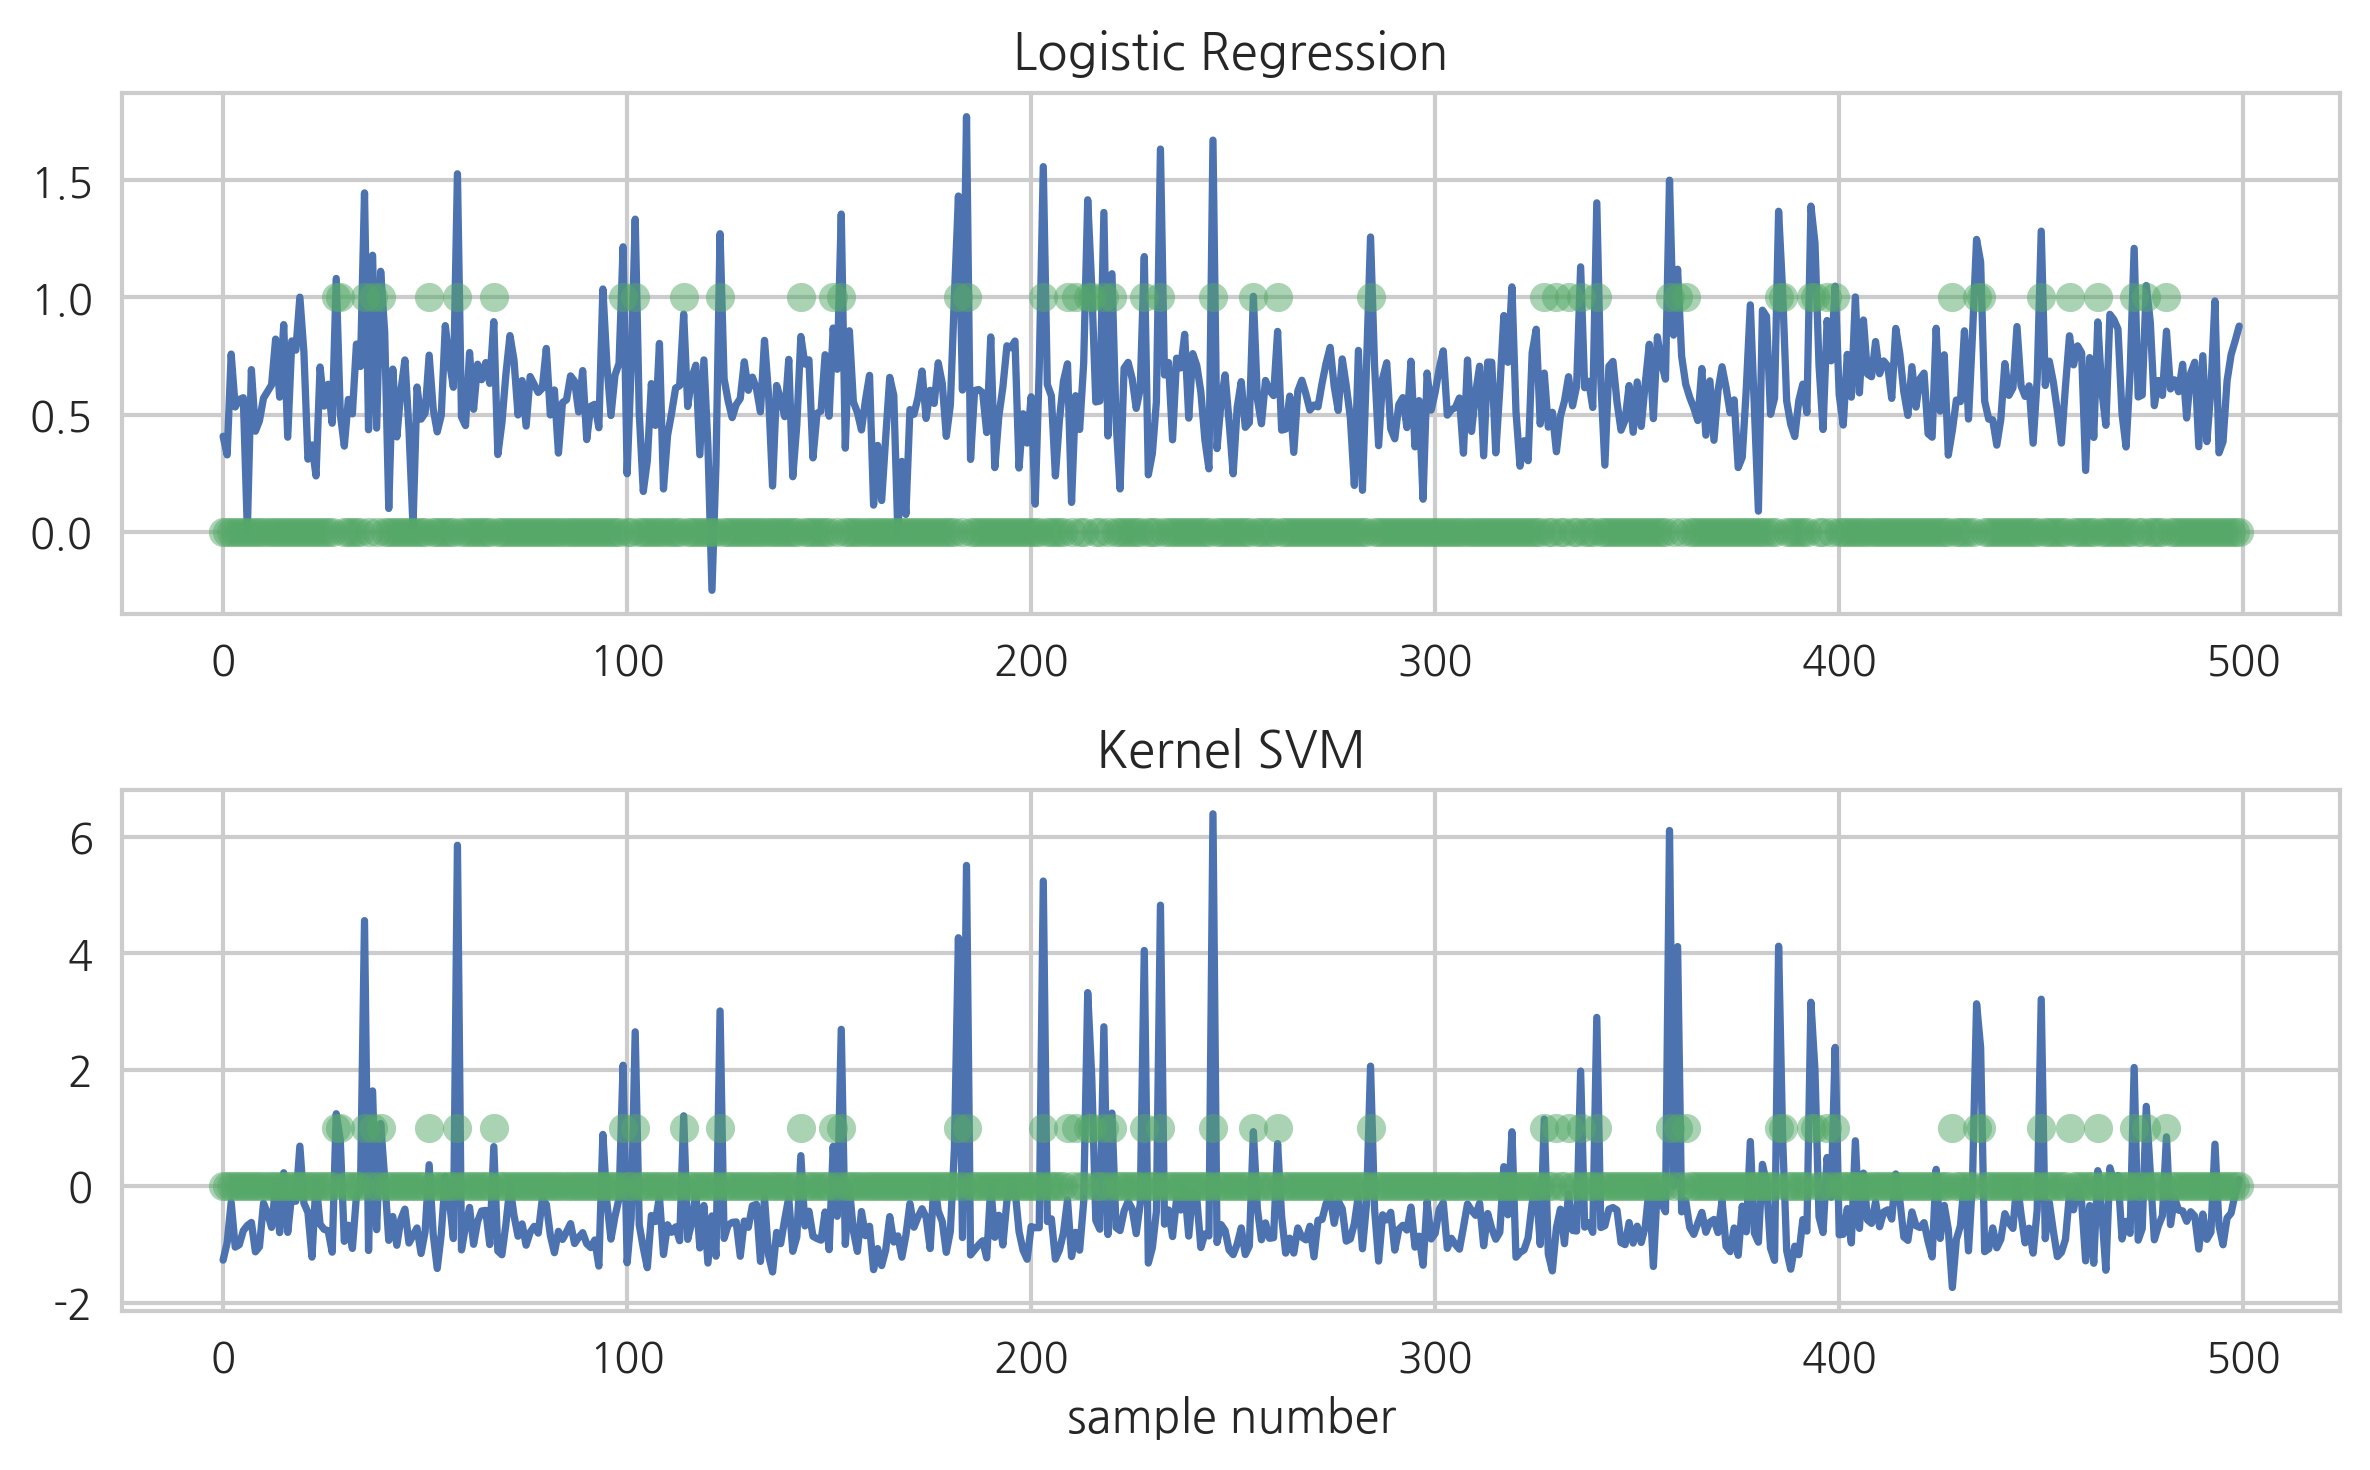

In [20]:
N = 500

plt.subplot(211)
plt.plot(model1.decision_function(X[:N]) * 0.1 + 1)
plt.plot(y[:N], 'o', alpha=0.5)
plt.title("Logistic Regression")

plt.subplot(212)
plt.plot(model2.decision_function(X[:N]) + 1)
plt.plot(y[:N], 'o', alpha=0.5)
plt.title("Kernel SVM")
plt.xlabel("sample number")

plt.tight_layout()
plt.show()

## AUC (Area Under the Curve)

AUC는 ROC curve의 면적을 뜻한다. Fall-Out 대비 Recall 값이 클 수록 AUC가 1에 가까운 값이며 민감한 모형이다.

In [21]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9227893798140808, 0.9486326091892203)

다중 클래스에 대해서는 정밀도, 재현율, 위양성률을 구하거나 ROC 커브를 그릴 수 없으므로 각각의 클래스에 대해 OvR 문제를 가정하여 각각의 OvR 문제에 대해 ROC 커브를 그린다.

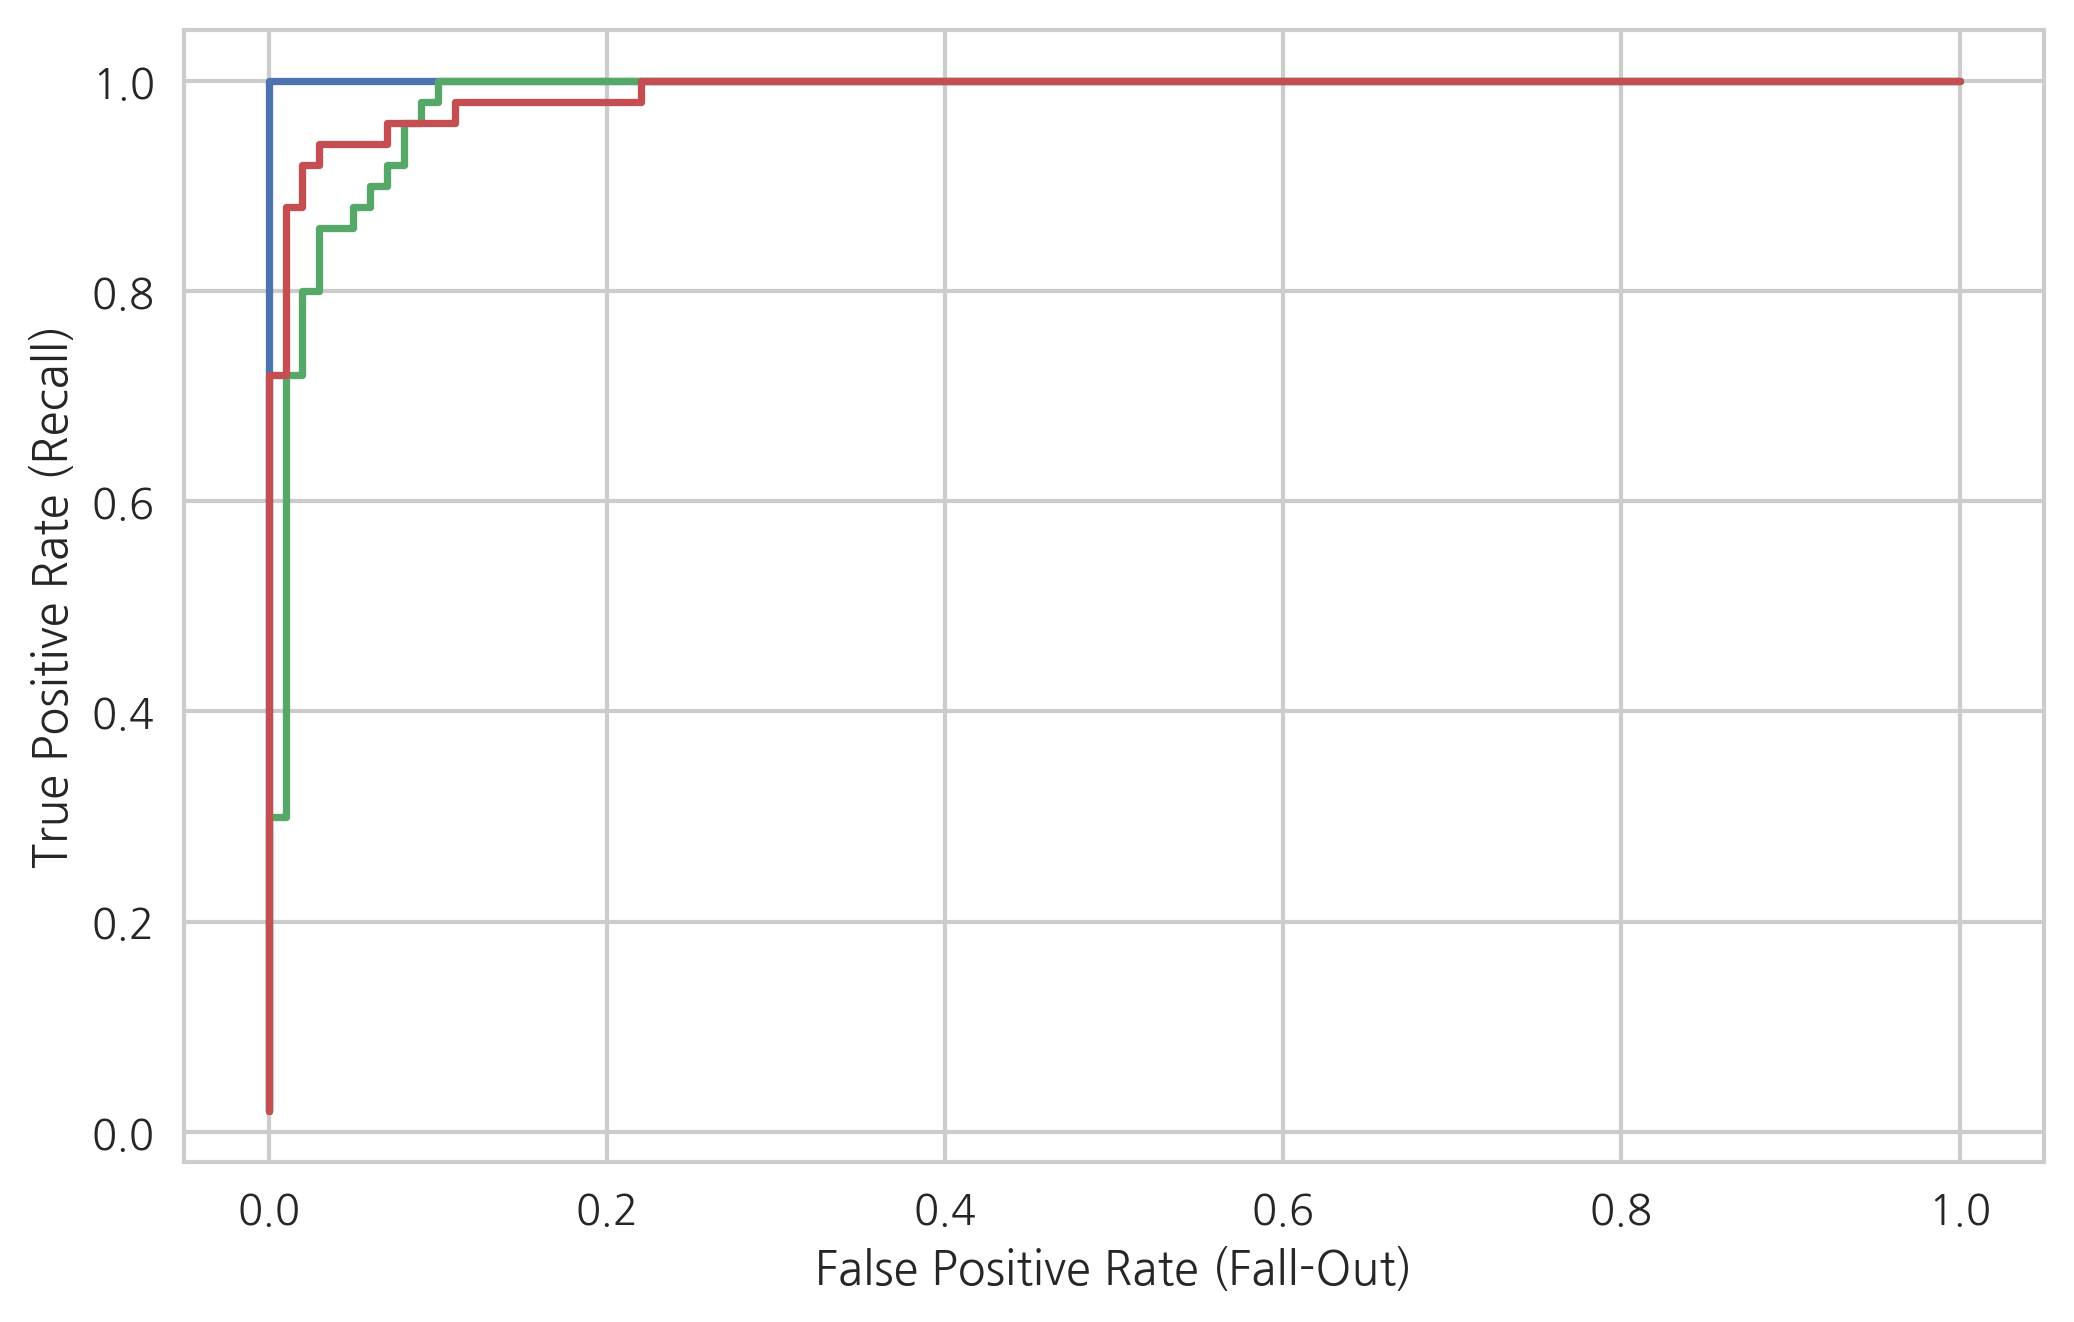

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()